In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import utils

In [2]:
data = pd.read_parquet(Path("data") / "train.parquet")
#data.head()

In [3]:
data["index"] = data.index
#data

In [4]:
#data.info()

In [5]:
#data.nunique(axis=0)

In [6]:
start_date = data["date"].min()
end_date = data["date"].max()
print(start_date, end_date)

2020-09-01 01:00:00 2021-09-09 23:00:00


In [7]:
full_data =  utils._merge_external_data(data, is_train=True)

In [8]:
#full_data.head()

In [9]:
file_path = "data/external_data.csv"
df_ext = pd.read_csv(file_path, parse_dates=["date"])
df_ext = utils._column_rename(df_ext)

In [11]:
df_ext["date"] = pd.to_datetime(df_ext["date"], errors="coerce").astype(
    "datetime64[ns]"
)
# df_ext = df_ext.sort_values(by=["date"], ascending=True)
df_ext = df_ext.sort_values("date").reset_index(drop=True)
#df_ext.head()

In [12]:
data = data.sort_values("date")

In [13]:
data = pd.merge_asof(data, df_ext, on="date", direction="nearest")
data.index = data["index"]
#data

In [14]:
data["counter_name"].unique()

['28 boulevard Diderot O-E', 'Face au 8 avenue de la porte de Charenton SE-NO', 'Face 104 rue d'Aubervilliers S-N', '90 Rue De Sèvres NE-SO', 'Face au 4 avenue de la porte de Bagnolet E-O', ..., '39 quai François Mauriac NO-SE', 'Pont de Bercy SO-NE', 'Voie Georges Pompidou SO-NE', '254 rue de Vaugirard SO-NE', '254 rue de Vaugirard NE-SO']
Length: 56
Categories (56, object): ['152 boulevard du Montparnasse E-O', '152 boulevard du Montparnasse O-E', '18 quai de l'Hôtel de Ville NO-SE', '18 quai de l'Hôtel de Ville SE-NO', ..., 'Totem Cours la Reine E-O', 'Totem Cours la Reine O-E', 'Voie Georges Pompidou NE-SO', 'Voie Georges Pompidou SO-NE']

/opt/anaconda3/envs/py312-myenv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


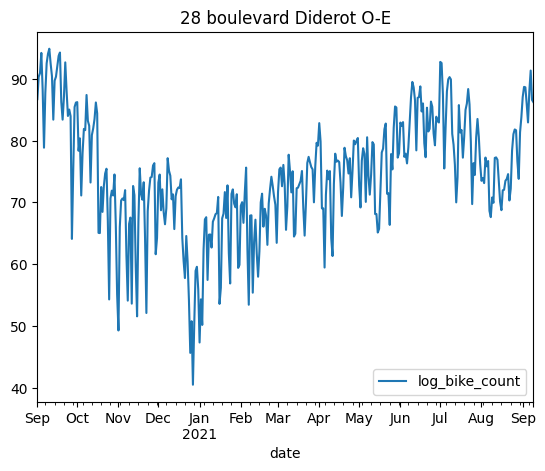

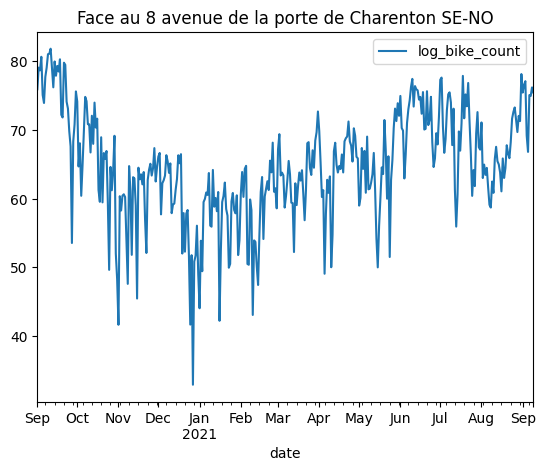

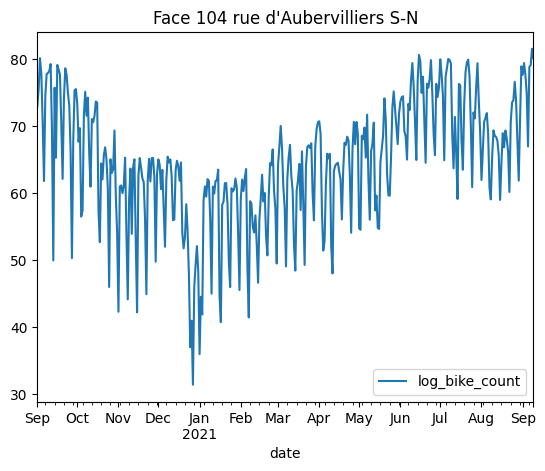

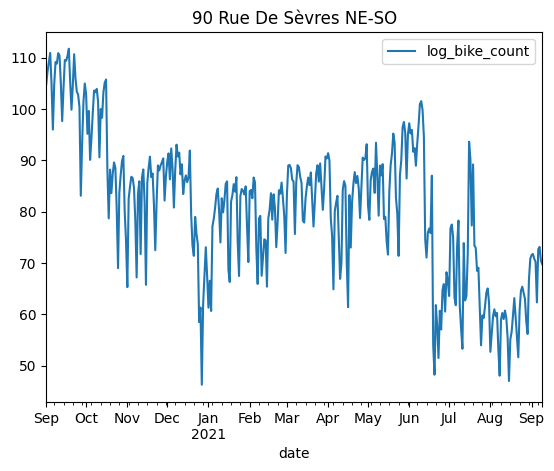

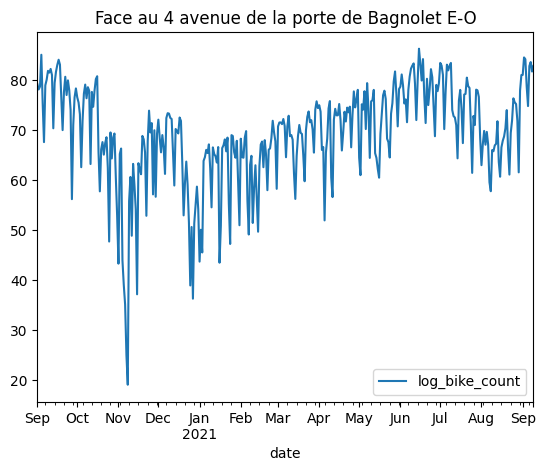

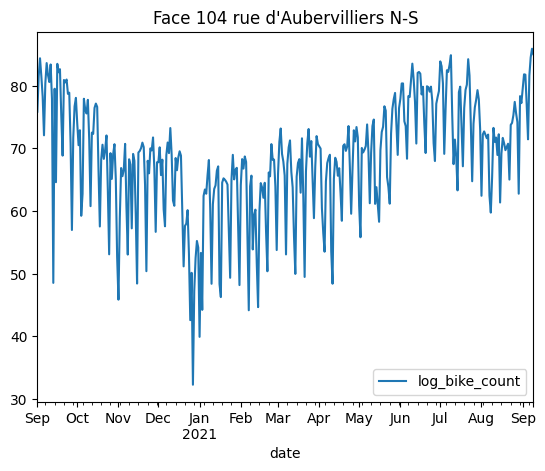

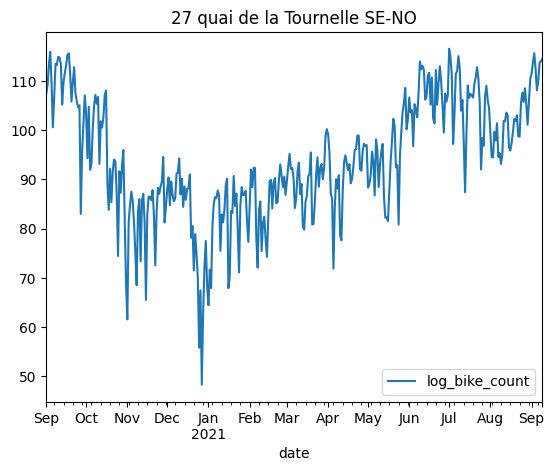

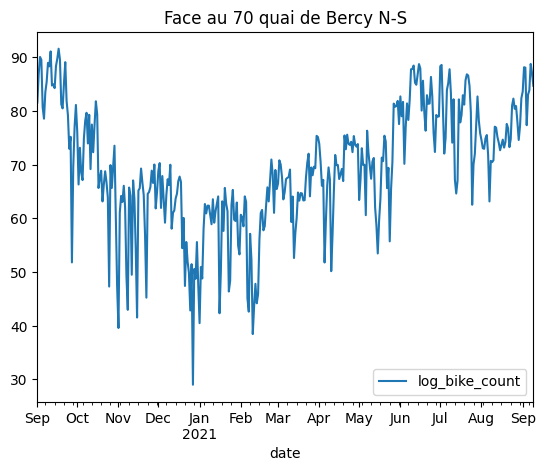

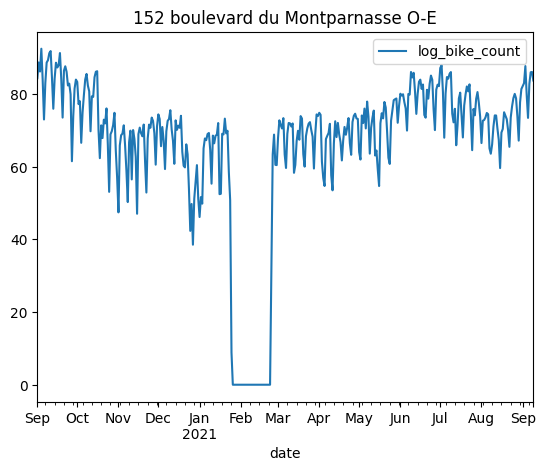

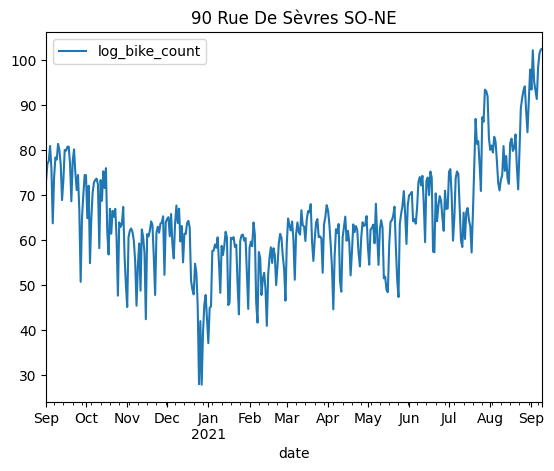

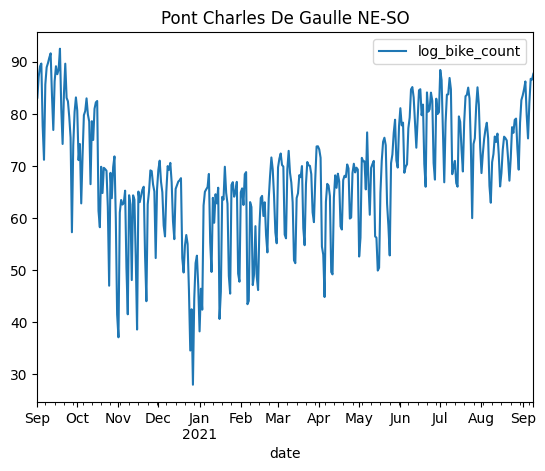

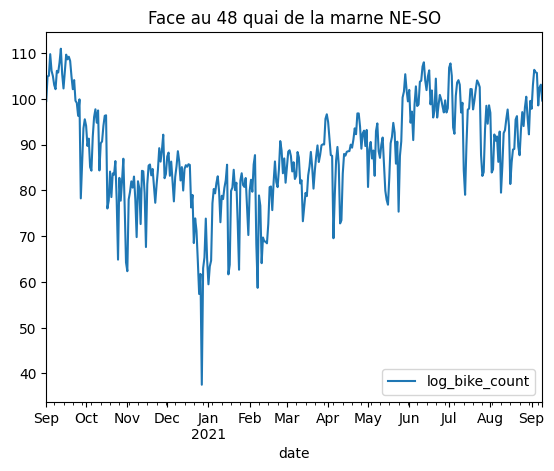

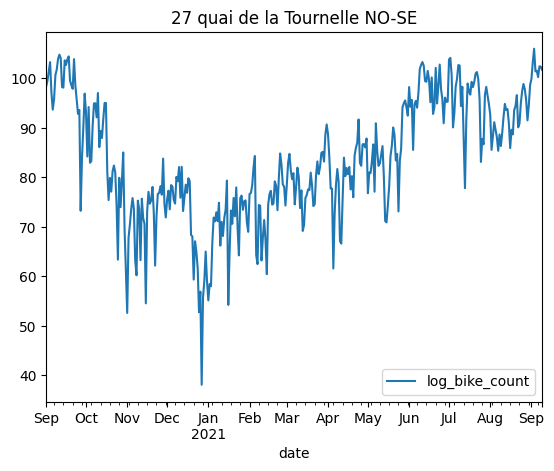

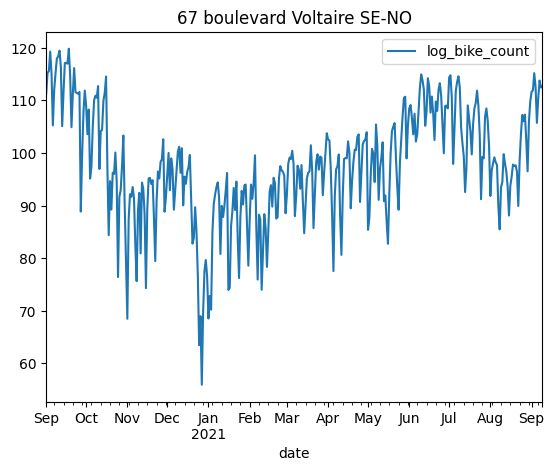

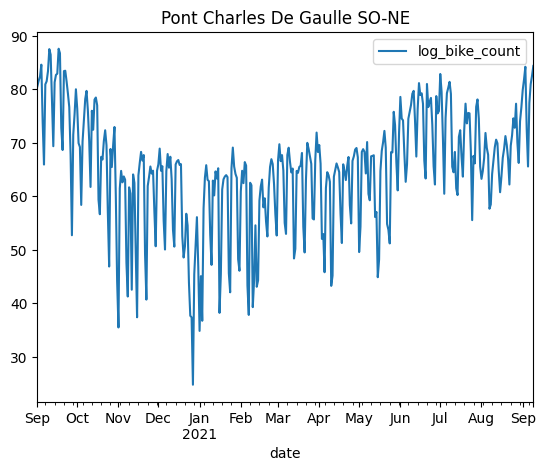

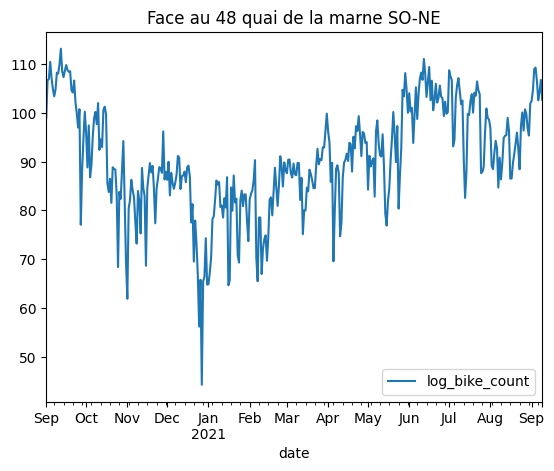

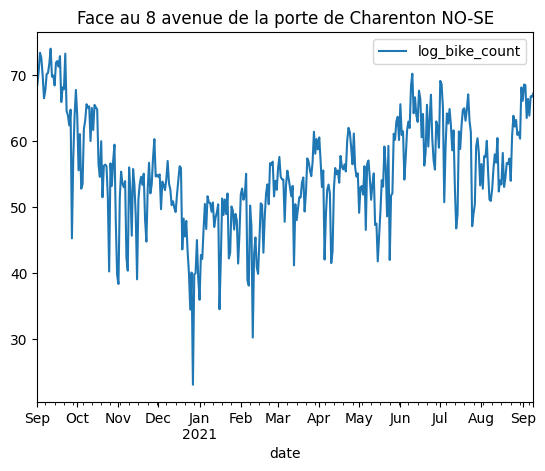

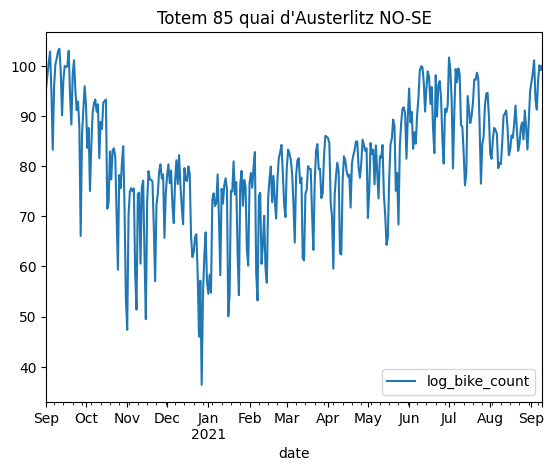

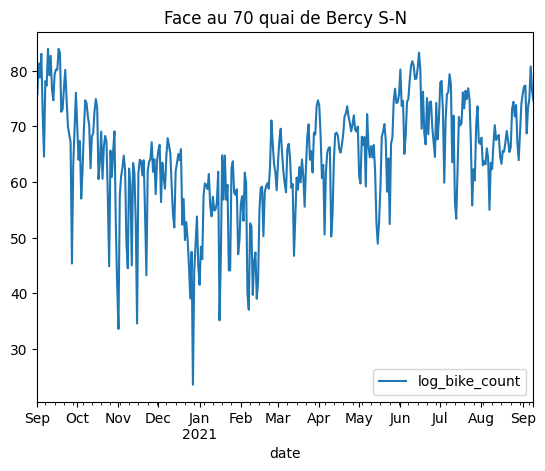

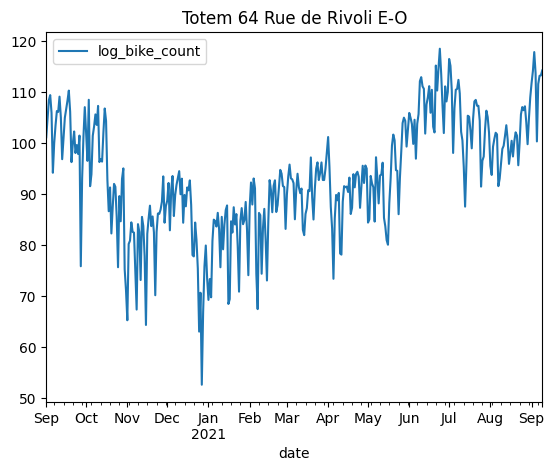

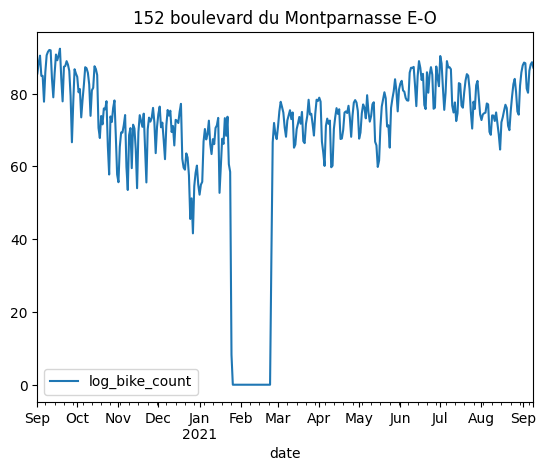

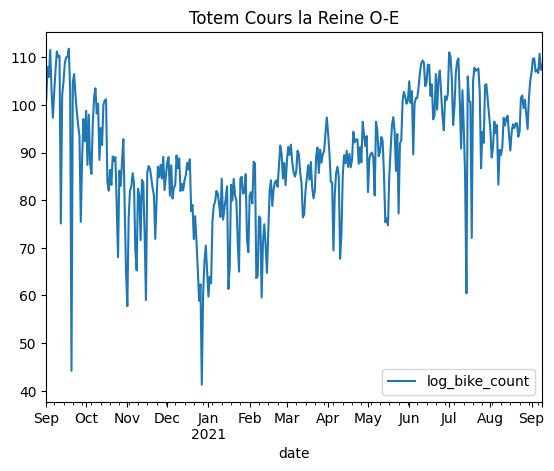

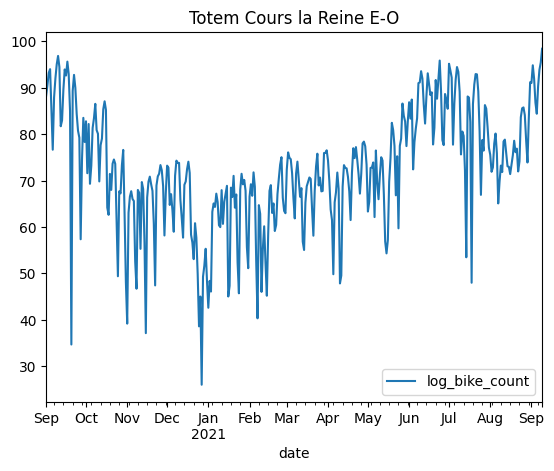

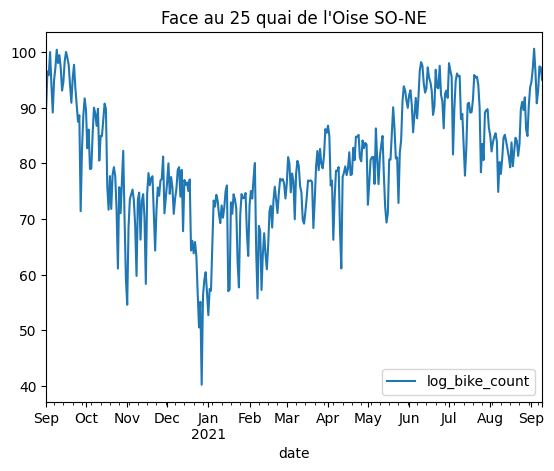

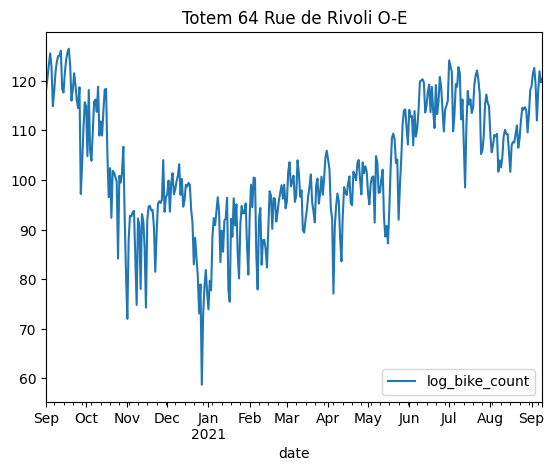

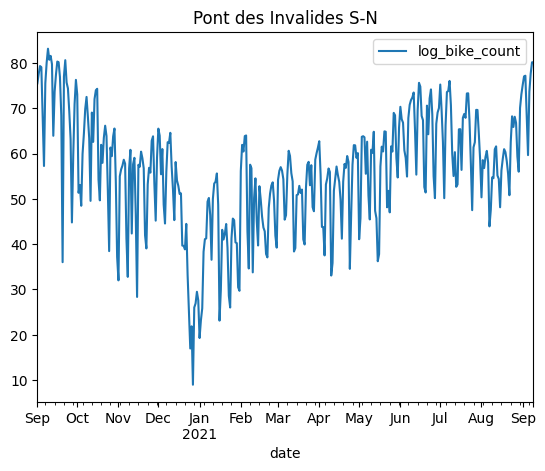

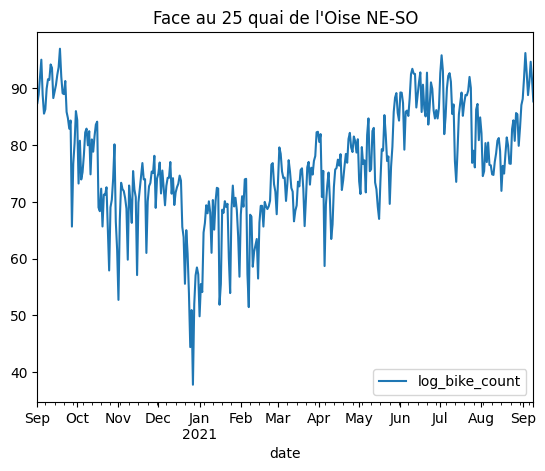

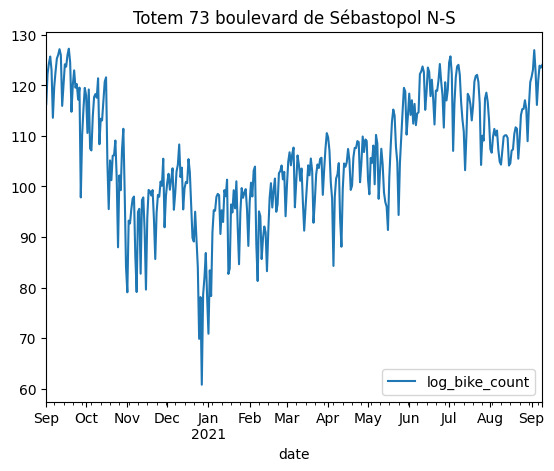

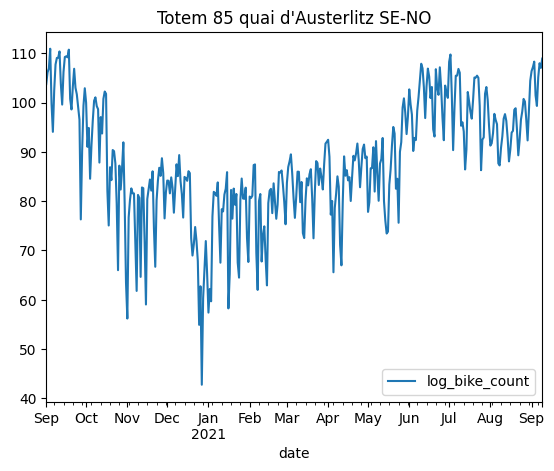

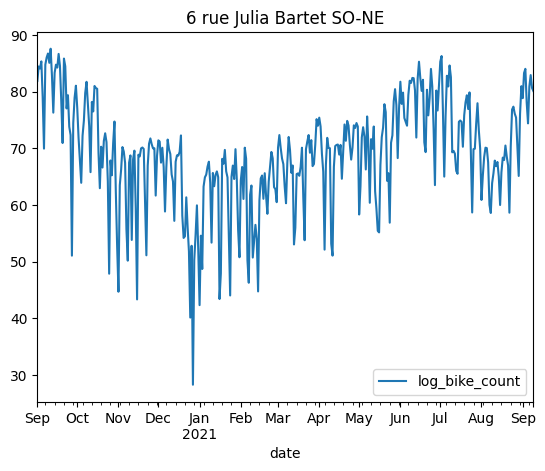

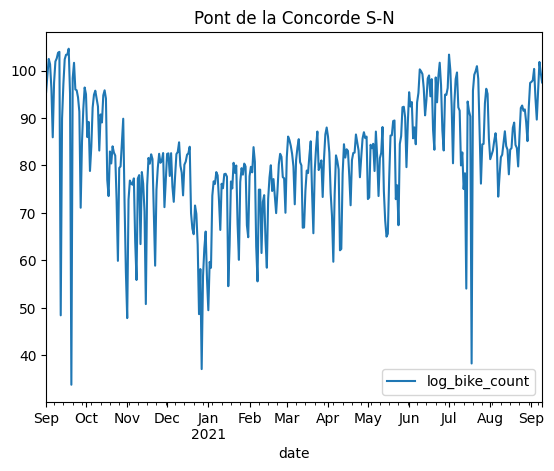

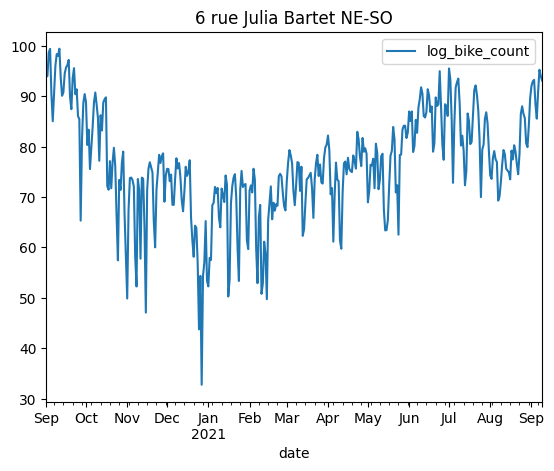

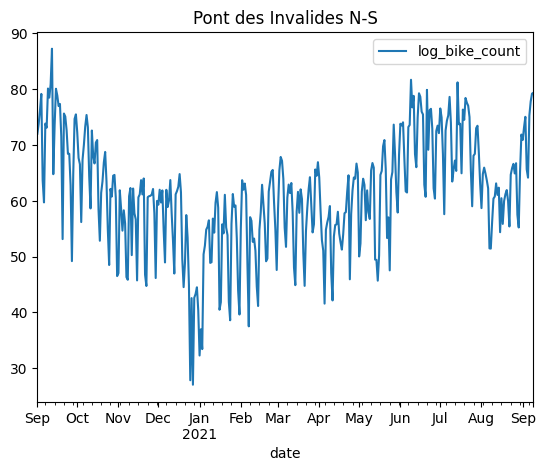

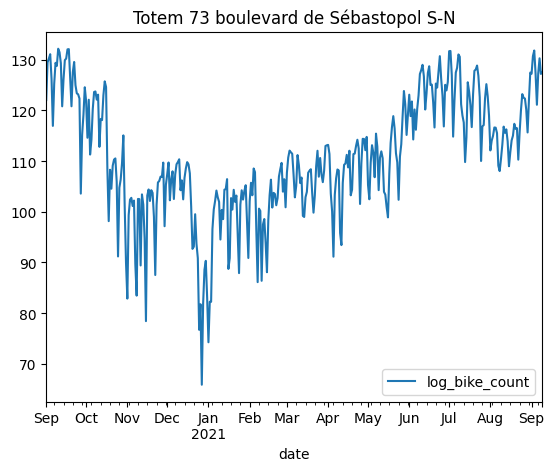

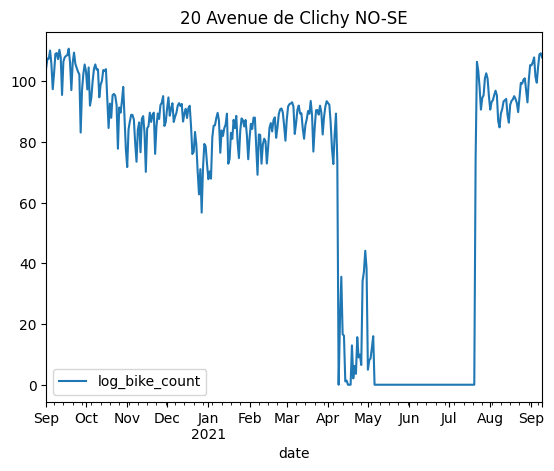

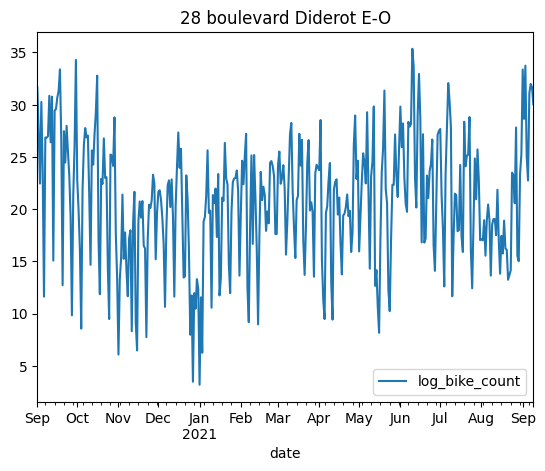

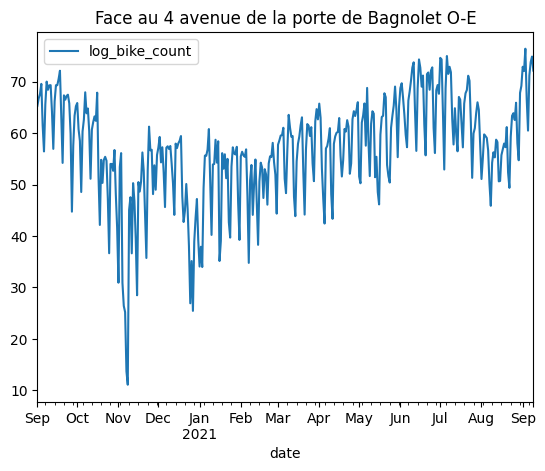

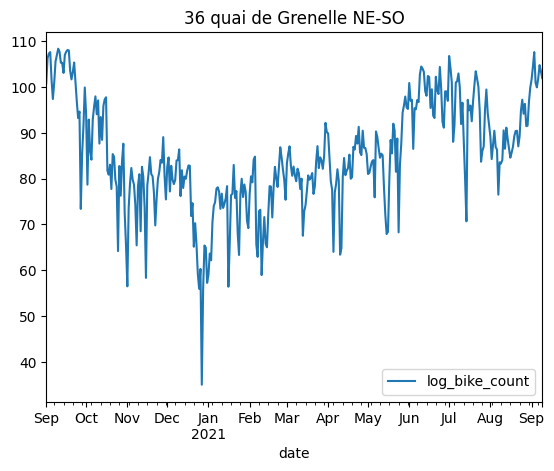

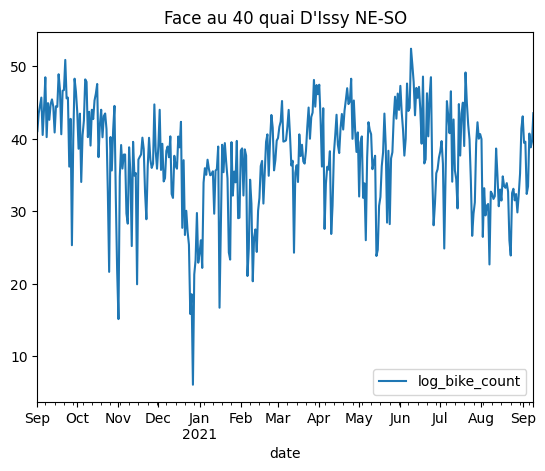

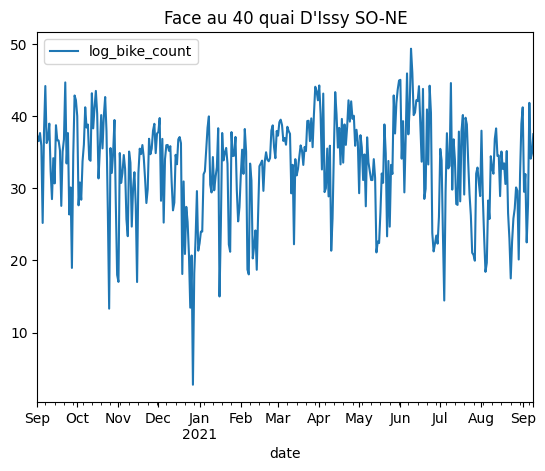

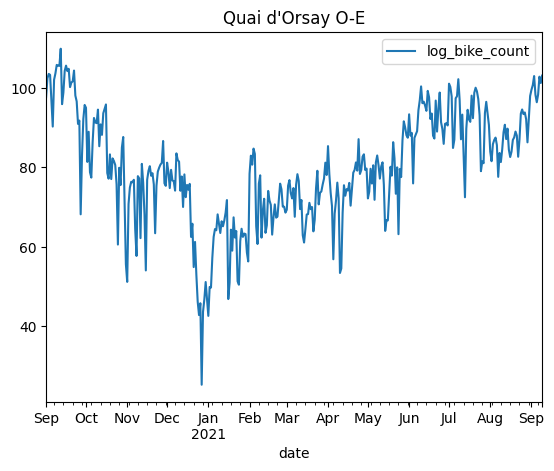

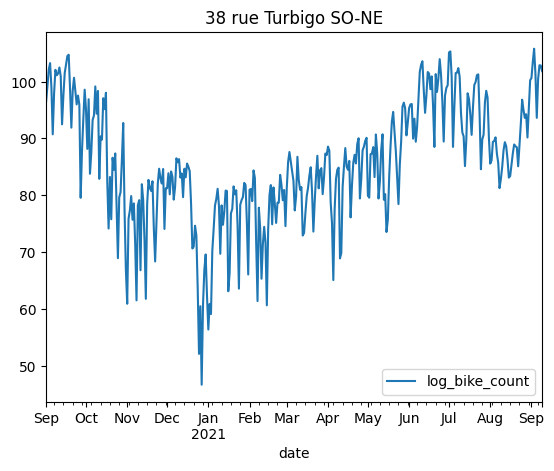

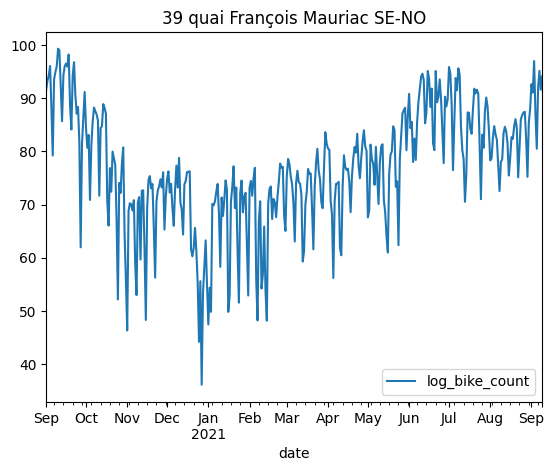

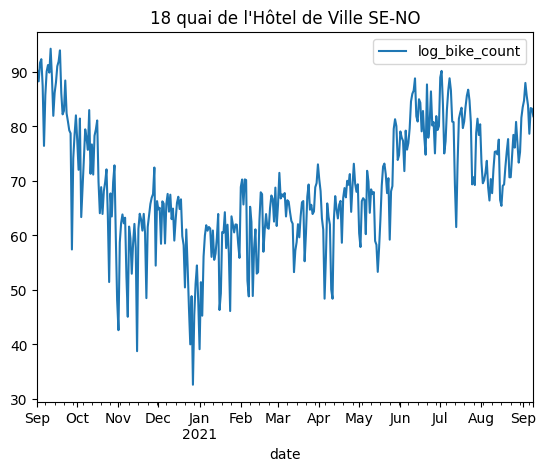

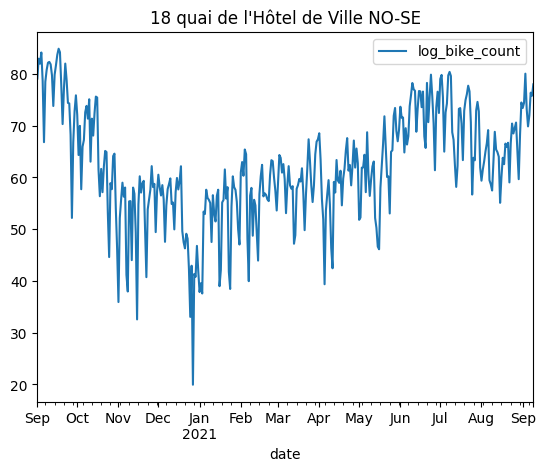

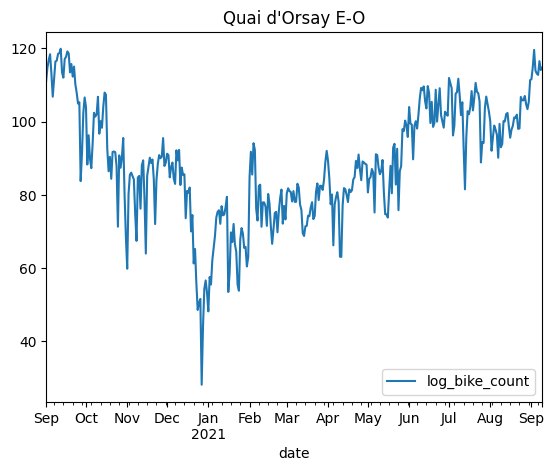

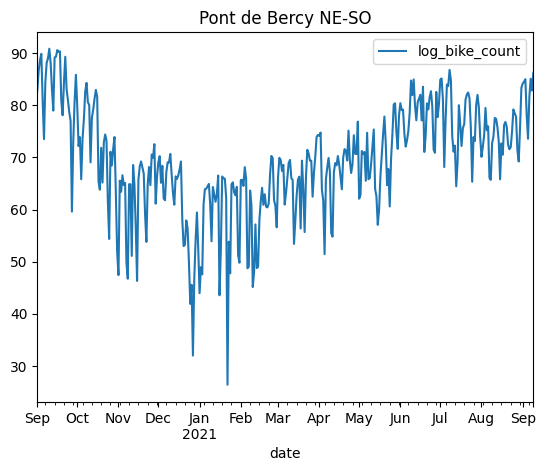

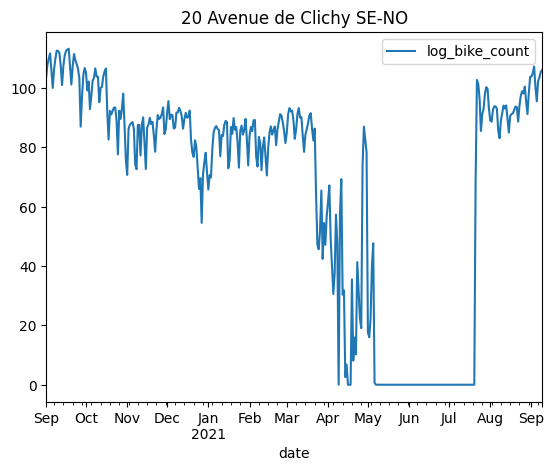

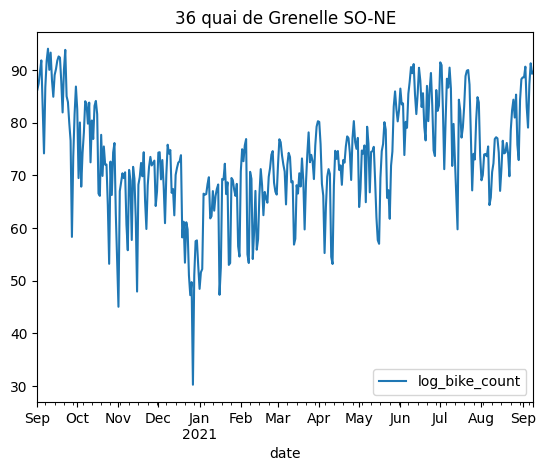

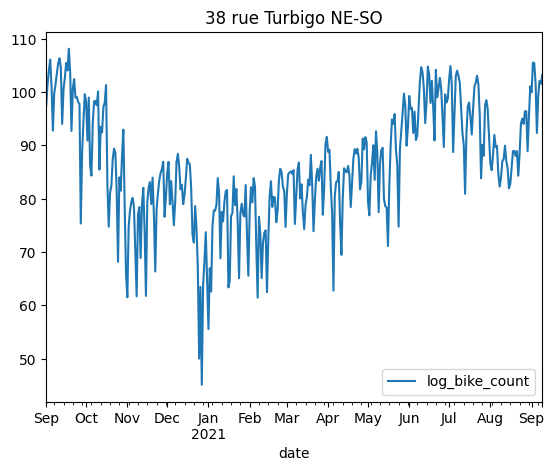

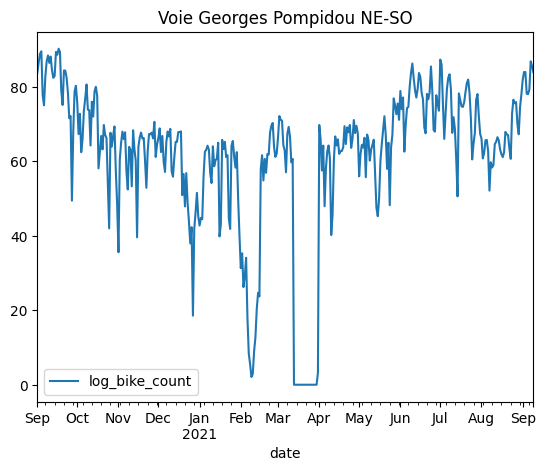

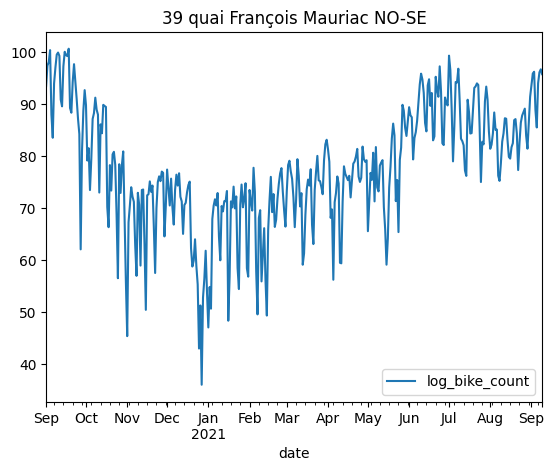

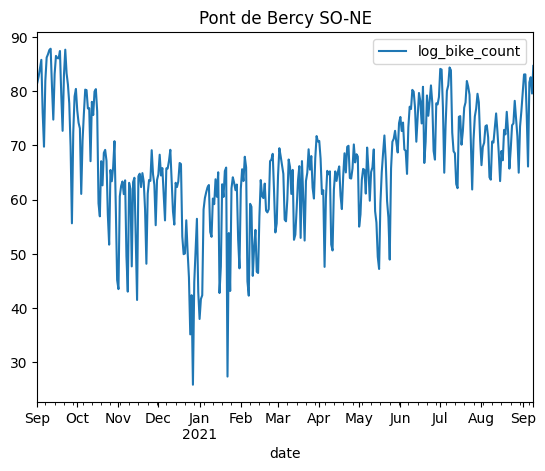

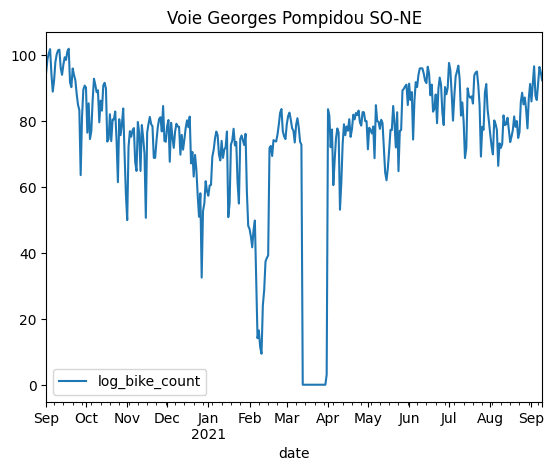

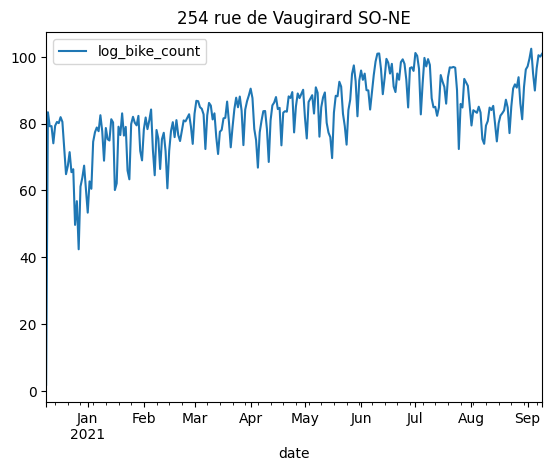

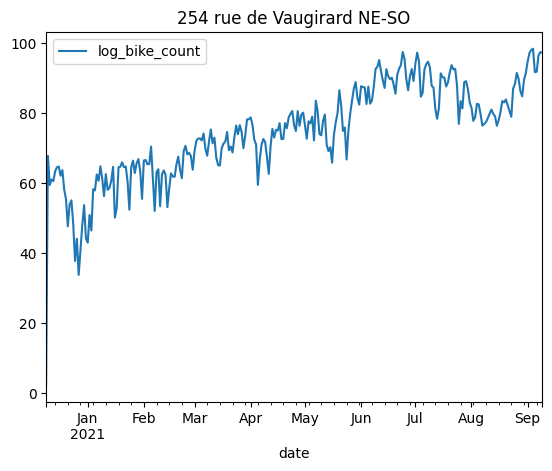

In [20]:
for counter in data["counter_name"].unique():
   mask = data["counter_name"] == counter
   data[mask].groupby(pd.Grouper(freq="1d", key="date"))[
   ["log_bike_count"]
   ].sum().plot()
   plt.title(counter)